In [1]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv(r'C:\Users\aksha\Downloads\Company_Data (1).csv')
df
     

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df['High'] = df['Sales'].map(lambda x: 1 if x>8 else 0)

In [5]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})


In [6]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,3,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,3,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,2,55,11,No,Yes,0
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,3,50,12,Yes,Yes,0


In [7]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [8]:
df['Urban']=label.fit_transform(df['Urban'])

In [9]:
df['US']=label.fit_transform(df['US'])

In [10]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,3,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,3,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,3,50,12,1,1,0


In [12]:
features=df.drop(['Sales','High'],axis=1)

In [17]:
target=df[['High']]

In [18]:
features

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [19]:
target

,High
0,1
1,1
2,1
3,0
4,0
...,...
395,1
396,0
397,0
398,0


In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,train_size=0.75,random_state=100)

In [21]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=14,splitter='random')

In [22]:
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=14, splitter='random')

In [23]:
ypredt=dtree.predict(xtest)

In [24]:
accuracy_score(ytest,ypredt)

0.74

In [25]:
conf=confusion_matrix(ytest,ypredt)

In [26]:
conf

array([[46, 19],
       [ 7, 28]], dtype=int64)

<Axes: >

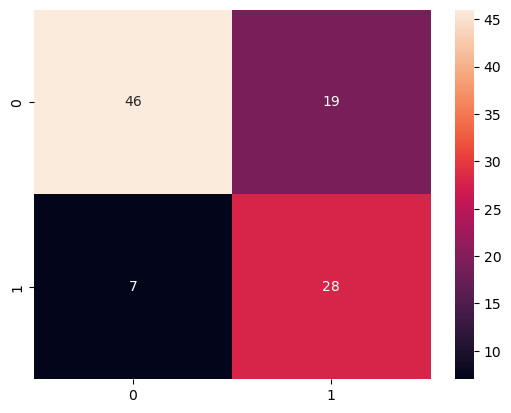

In [27]:
sns.heatmap(conf,annot=True)

In [28]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [29]:
grid=GridSearchCV(dtree,params)

In [30]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=14, splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'splitter': ['best', 'random']})

In [31]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 14, 'splitter': 'best'}

In [32]:
dtree1=DecisionTreeClassifier(criterion='entropy',max_depth=14,splitter='best')

In [33]:
dtree1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=14)

In [34]:
ypredt1=dtree1.predict(xtest)

In [35]:
accuracy_score(ytest,ypredt1)

0.74

In [36]:
conf=confusion_matrix(ytest,ypredt1)

<Axes: >

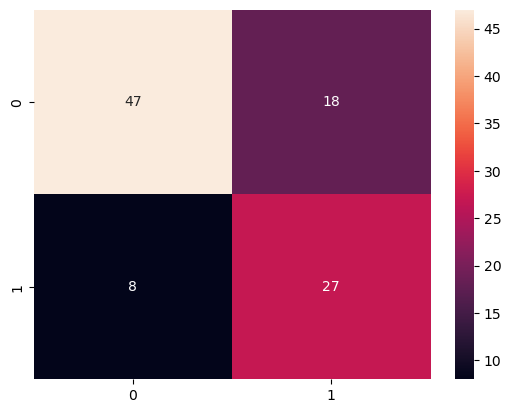

In [37]:
sns.heatmap(conf,annot=True)

[Text(0.35397727272727275, 0.9583333333333334, 'node #0\nx[5] <= 1.5\nentropy = 0.986\nsamples = 100.0%\nvalue = [0.57, 0.43]'),
 Text(0.1, 0.875, 'node #1\nx[9] <= 0.5\nentropy = 0.741\nsamples = 20.7%\nvalue = [0.21, 0.79]'),
 Text(0.03636363636363636, 0.7916666666666666, 'node #2\nx[4] <= 109.0\nentropy = 1.0\nsamples = 6.7%\nvalue = [0.5, 0.5]'),
 Text(0.01818181818181818, 0.7083333333333334, 'node #3\nentropy = 0.0\nsamples = 2.3%\nvalue = [0.0, 1.0]'),
 Text(0.05454545454545454, 0.7083333333333334, 'node #4\nx[0] <= 147.0\nentropy = 0.779\nsamples = 4.3%\nvalue = [0.769, 0.231]'),
 Text(0.03636363636363636, 0.625, 'node #5\nx[6] <= 38.0\nentropy = 0.439\nsamples = 3.7%\nvalue = [0.909, 0.091]'),
 Text(0.01818181818181818, 0.5416666666666666, 'node #6\nentropy = 0.0\nsamples = 0.3%\nvalue = [0.0, 1.0]'),
 Text(0.05454545454545454, 0.5416666666666666, 'node #7\nentropy = 0.0\nsamples = 3.3%\nvalue = [1.0, 0.0]'),
 Text(0.07272727272727272, 0.625, 'node #8\nentropy = 0.0\nsamples = 

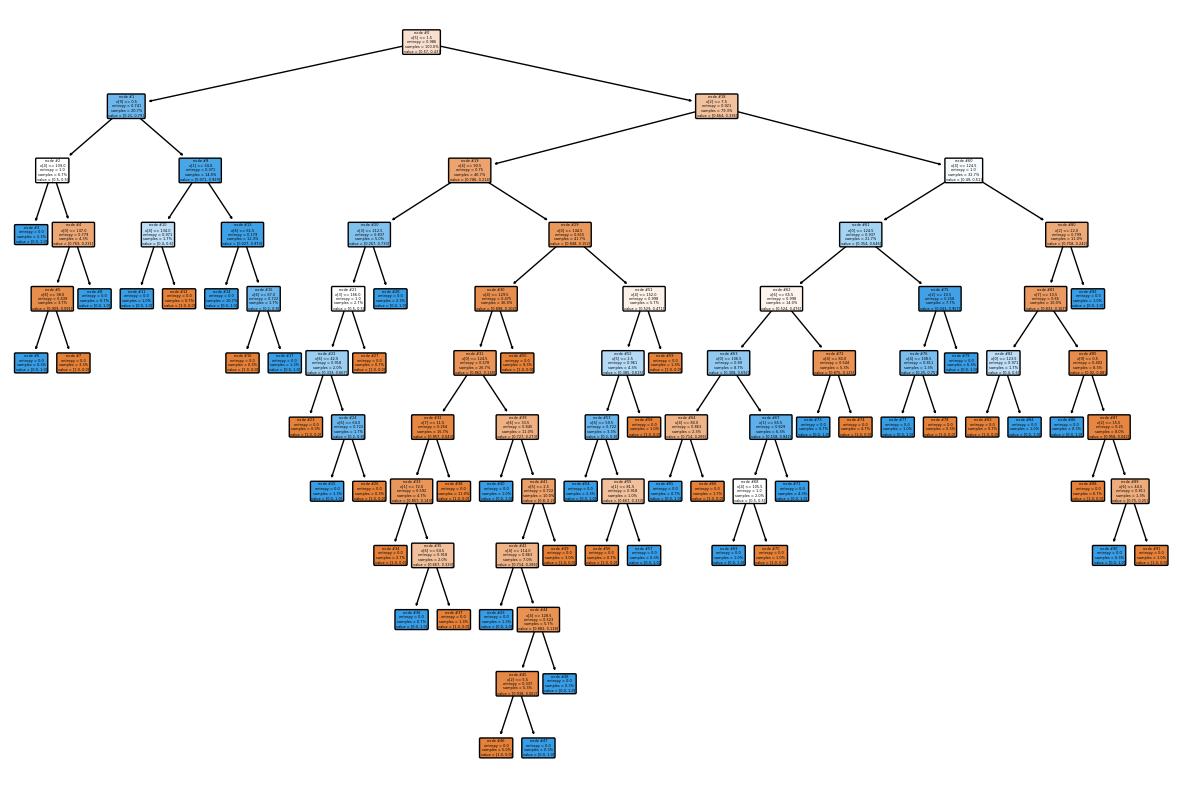

In [38]:
plt.figure(figsize=(15,10))
plot_tree(  dtree1,
    max_depth=14,
    feature_names=df.get(features),
    class_names=None,
    label='all',
    filled=True,
    impurity=True,
    node_ids=True,
    proportion=True,
    rounded=True,
    precision=3,
    ax=None,
)